In [1]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import shap
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)


### Fetch Data

In [2]:
folder_path = 'data/horse-tracking-data'
derby_path = 'data/big-data-derby-2022'
# List to store filenames and paths
file_list = []
race_list = []
# Iterate through the folder
for root, _, files in os.walk(folder_path):
    for file in files:
        if file.endswith('.csv'):  # Check if the file is a CSV
            full_path = os.path.join(root, file)
            file_list.append(full_path)
            race_list.append(file.split('.')[0])

print(file_list)
print(race_list)

['data/horse-tracking-data/SAR_2019-08-04_11.csv', 'data/horse-tracking-data/BEL_2019-10-18_8.csv', 'data/horse-tracking-data/AQU_2019-12-06_3.csv', 'data/horse-tracking-data/AQU_2019-11-03_10.csv', 'data/horse-tracking-data/BEL_2019-05-04_4.csv', 'data/horse-tracking-data/AQU_2019-04-13_9.csv', 'data/horse-tracking-data/AQU_2019-11-29_6.csv', 'data/horse-tracking-data/AQU_2019-12-15_9.csv', 'data/horse-tracking-data/AQU_2019-02-16_8.csv', 'data/horse-tracking-data/AQU_2019-02-23_1.csv', 'data/horse-tracking-data/AQU_2019-03-23_1.csv', 'data/horse-tracking-data/AQU_2019-03-16_8.csv', 'data/horse-tracking-data/AQU_2019-11-27_9.csv', 'data/horse-tracking-data/BEL_2019-05-19_1.csv', 'data/horse-tracking-data/BEL_2019-10-16_7.csv', 'data/horse-tracking-data/SAR_2019-08-07_2.csv', 'data/horse-tracking-data/BEL_2019-09-21_3.csv', 'data/horse-tracking-data/AQU_2019-02-18_7.csv', 'data/horse-tracking-data/SAR_2019-08-14_8.csv', 'data/horse-tracking-data/AQU_2019-01-11_1.csv', 'data/horse-track

In [3]:
# Create Main Data Frame
# Combine all CSV files into a single DataFrame
dataframes = []
for file in tqdm(file_list):
    df = pd.read_csv(file)
    dataframes.append(df)

# Concatenate all DataFrames
combined_df = pd.concat(dataframes, ignore_index=True)


  0%|          | 0/1994 [00:00<?, ?it/s]

100%|██████████| 1994/1994 [00:13<00:00, 146.05it/s]


In [4]:
combined_df.shape

(5213947, 37)

In [5]:
combined_df.columns

Index(['track_id', 'race_date', 'race_number', 'program_number',
       'trakus_index', 'latitude', 'longitude', 'easting', 'northing',
       'unique_id', 'cumulative_distance_travelled', 'position',
       'distance_to_leader', 'speed_0.25s', 'speed_1s', 'acceleration_0.25s',
       'acceleration_1s', 'speed_0.25s_lag1', 'speed_0.25s_lag2',
       'speed_0.25s_lag3', 'acceleration_0.25s_lag1',
       'acceleration_0.25s_lag2', 'acceleration_0.25s_lag3', 'speed_1s_lag1',
       'speed_1s_lag2', 'speed_1s_lag3', 'acceleration_1s_lag1',
       'acceleration_1s_lag2', 'acceleration_1s_lag3',
       'distance_to_leader_lag1', 'distance_to_leader_lag2',
       'distance_to_leader_lag3', 'remaining_distance', 'is_race_going',
       'final_positions', 'leader_remaining_distance', 'target_variable'],
      dtype='object')

In [6]:
combined_df['is_race_going'].describe()

count     5213947
unique          2
top          True
freq      4628135
Name: is_race_going, dtype: object

In [7]:
combined_df_trimmed = combined_df[combined_df['is_race_going']]
combined_df_trimmed.shape

(4628135, 37)

In [ ]:
feature_columns = [
       'position', #'cumulative_distance_travelled',

       'distance_to_leader', 'speed_1s','acceleration_1s', 
       
       # 'speed_1s_lag1', 'speed_1s_lag2', 'speed_1s_lag3', 
       
       # 'acceleration_1s_lag1','acceleration_1s_lag2', 'acceleration_1s_lag3',

       # 'distance_to_leader_lag1', 'distance_to_leader_lag2', 'distance_to_leader_lag3',
      
        'leader_remaining_distance'] #'remaining_distance',

target = ['target_variable']

In [2]:
X = combined_df_trimmed[feature_columns]
y = combined_df_trimmed[target]
X.shape, y.shape

NameError: name 'combined_df_trimmed' is not defined

In [ ]:
correlation_matrix = X.corr()

In [3]:
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=False,        # Annotate cells with correlation coefficients
    cmap='coolwarm',   # Color scheme
    fmt=".2f",         # Format numbers to 2 decimal places
    linewidths=0.5     # Add gridlines between cells
)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

NameError: name 'plt' is not defined

In [4]:
y.describe()

NameError: name 'y' is not defined

Put Y values in range

In [21]:
y['target_variable'] = y['target_variable'].apply(lambda x : 0 if x<0 else 0.999999 if x>=1 else x)

/var/folders/b9/bslcg5p949522myh51h02xt40000gn/T/ipykernel_46514/883906999.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [39]:
y.describe()

,target_variable
count,4.628135e+06
mean,1.839847e-03
std,1.158837e-02
min,-0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,1.956960e-03
max,9.999990e-01


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (3702508, 5)
X_test shape: (925627, 5)
y_train shape: (3702508, 1)
y_test shape: (925627, 1)


### Model Fitting

In [23]:
model = XGBRegressor(n_estimators=100, learning_rate=0.01, random_state=42, max_depth = 5)


In [24]:
model.fit(X_train,y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [25]:
# copies
X_train_pred = X_train.copy()
X_test_pred = X_test.copy()



In [26]:
X_train_pred['pred'] = model.predict(X_train)
X_test_pred['pred'] = model.predict(X_test)

In [27]:
X_train_pred['pred'].describe(), X_test_pred['pred'].describe()

(count    3.702508e+06
 mean     1.836793e-03
 std      1.612754e-03
 min      6.573769e-04
 25%      1.006211e-03
 50%      1.533318e-03
 75%      2.235115e-03
 max      4.827342e-02
 Name: pred, dtype: float64,
 count    925627.000000
 mean          0.001836
 std           0.001616
 min           0.000657
 25%           0.001006
 50%           0.001533
 75%           0.002235
 max           0.039517
 Name: pred, dtype: float64)

In [28]:
X_train_pred['pred'] = X_train_pred['pred'].apply(lambda x : 0 if x<0 else 0.999999 if x>=1 else x)
X_test_pred['pred'] = X_test_pred['pred'].apply(lambda x : 0 if x<0 else 0.999999 if x>=1 else x)

In [29]:
X_train_pred['pred'].describe()

count    3.702508e+06
mean     1.836793e-03
std      1.619524e-03
min      6.573769e-04
25%      1.006211e-03
50%      1.533318e-03
75%      2.235115e-03
max      4.827342e-02
Name: pred, dtype: float64

In [30]:
train_rmse = mean_squared_error(y_train['target_variable'], X_train_pred['pred'], squared=False)
test_rmse = mean_squared_error(y_test['target_variable'], X_test_pred['pred'], squared=False)
print("Train RMSE: ", train_rmse)
print("Test  RMSE: ", test_rmse)

Train RMSE:  0.011236677516377813
Test  RMSE:  0.011510642118639058


### Try Normalization

In [260]:
folder_path = 'data/horse-tracking-data'
derby_path = 'data/big-data-derby-2022'
# List to store filenames and paths
file_list = []
race_list = []
# Iterate through the folder
for root, _, files in os.walk(folder_path):
    for file in files:
        if file.endswith('.csv'):  # Check if the file is a CSV
            full_path = os.path.join(root, file)
            file_list.append(full_path)
            race_list.append(file.split('.')[0])

print(file_list)
print(race_list)

['data/horse-tracking-data/SAR_2019-08-04_11.csv', 'data/horse-tracking-data/BEL_2019-10-18_8.csv', 'data/horse-tracking-data/AQU_2019-12-06_3.csv', 'data/horse-tracking-data/AQU_2019-11-03_10.csv', 'data/horse-tracking-data/BEL_2019-05-04_4.csv', 'data/horse-tracking-data/AQU_2019-04-13_9.csv', 'data/horse-tracking-data/AQU_2019-11-29_6.csv', 'data/horse-tracking-data/AQU_2019-12-15_9.csv', 'data/horse-tracking-data/AQU_2019-02-16_8.csv', 'data/horse-tracking-data/AQU_2019-02-23_1.csv', 'data/horse-tracking-data/AQU_2019-03-23_1.csv', 'data/horse-tracking-data/AQU_2019-03-16_8.csv', 'data/horse-tracking-data/AQU_2019-11-27_9.csv', 'data/horse-tracking-data/BEL_2019-05-19_1.csv', 'data/horse-tracking-data/BEL_2019-10-16_7.csv', 'data/horse-tracking-data/SAR_2019-08-07_2.csv', 'data/horse-tracking-data/BEL_2019-09-21_3.csv', 'data/horse-tracking-data/AQU_2019-02-18_7.csv', 'data/horse-tracking-data/SAR_2019-08-14_8.csv', 'data/horse-tracking-data/AQU_2019-01-11_1.csv', 'data/horse-track

In [261]:
# Create Main Data Frame
# Combine all CSV files into a single DataFrame
dataframes = []
for file in tqdm(file_list):
    df = pd.read_csv(file)
    dataframes.append(df)

# Concatenate all DataFrames
combined_df = pd.concat(dataframes, ignore_index=True)


100%|██████████| 1994/1994 [00:14<00:00, 139.00it/s]


In [262]:
combined_df_trimmed = combined_df[combined_df['is_race_going']]
combined_df_trimmed.shape

(4628135, 37)

In [263]:
feature_columns = [
       'cumulative_distance_travelled', 'position',

       'distance_to_leader', 'speed_1s','acceleration_1s', 
       
       'speed_1s_lag1', 'speed_1s_lag2', 'speed_1s_lag3', 
       
       'acceleration_1s_lag1','acceleration_1s_lag2', 'acceleration_1s_lag3',

       'distance_to_leader_lag1', 'distance_to_leader_lag2', 'distance_to_leader_lag3',
      
       'remaining_distance', 'leader_remaining_distance']

target = ['target_variable']

In [243]:


# combined_df_trimmed[feature_columns] = scaler.fit_transform(combined_df_trimmed[feature_columns])
# combined_df_trimmed[target] = scaler.transform(combined_df_trimmed[target])

In [264]:
X = combined_df_trimmed[feature_columns]
y = combined_df_trimmed[target]
X.shape, y.shape

((4628135, 16), (4628135, 1))

In [265]:
y['target_variable'] = y['target_variable'].apply(lambda x : 0 if x<0 else 0.999999 if x>=1 else x)

/var/folders/b9/bslcg5p949522myh51h02xt40000gn/T/ipykernel_85831/883906999.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['target_variable'] = y['target_variable'].apply(lambda x : 0 if x<0 else 0.999999 if x>=1 else x)


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (3702508, 5)
X_test shape: (925627, 5)
y_train shape: (3702508, 1)
y_test shape: (925627, 1)


In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
scaler = StandardScaler()

# Normalize
X_train_scaled = scaler.fit_transform(X_train)  # NumPy array
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# target_scaler = StandardScaler()

# y_train_scaled = target_scaler.fit_transform(y_train)
# y_test_scaled = target_scaler.transform(y_test)

# # Convert back to DataFrame
# y_train_scaled = pd.DataFrame(y_train_scaled, columns=y_train.columns)
# y_test_scaled = pd.DataFrame(y_test_scaled, columns=y_test.columns)

In [33]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (3702508, 5)
X_test shape: (925627, 5)
y_train shape: (3702508, 1)
y_test shape: (925627, 1)


In [35]:
from sklearn.ensemble import ExtraTreesRegressor, GradientBoostingRegressor

model = XGBRegressor(n_estimators=100, learning_rate=0.01, random_state=42, max_depth = 5)
# model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.01, random_state=42, max_depth=5)

In [36]:
model.fit(X_train_scaled,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [37]:
# copies
X_train_pred = X_train.copy()
X_test_pred = X_test.copy()


In [ ]:
# X_train_pred = model.predict(X_train)
# X_test_pred = model.predict(X_test)


In [38]:
X_train_pred['pred'] = model.predict(X_train_scaled)
X_test_pred['pred'] = model.predict(X_test_scaled)

In [39]:
X_train_pred['pred'] = X_train_pred['pred'].apply(lambda x : 0 if x<0 else 0.999999 if x>=1 else x)
X_test_pred['pred'] = X_test_pred['pred'].apply(lambda x : 0 if x<0 else 0.999999 if x>=1 else x)

In [40]:
train_rmse = mean_squared_error(y_train['target_variable'], X_train_pred['pred'], squared=False)
test_rmse = mean_squared_error(y_test['target_variable'], X_test_pred['pred'], squared=False)
print("Train RMSE: ", train_rmse)
print("Test  RMSE: ", test_rmse)

Train RMSE:  0.011237252387859652
Test  RMSE:  0.01151115259155335


In [41]:
X_train_scaled

,position,distance_to_leader,speed_1s,acceleration_1s,leader_remaining_distance
0,1.369083,-0.305340,-2.768431,-0.022981,1.694466
1,0.979716,0.058817,-0.002176,-0.037469,1.047827
2,-0.188384,-0.259852,-0.224910,-0.047019,-0.984013
3,-0.577750,-0.177528,-0.292704,-0.037955,-0.847373
4,0.979716,0.098011,0.134608,-0.052996,-0.533943
...,...,...,...,...,...
3702503,-0.577750,-0.205392,0.008642,-0.006200,-0.042250
3702504,-0.967117,-0.282032,0.232459,-0.029626,-0.133344
3702505,-0.188384,0.334402,-0.216293,-0.041191,-0.893945
3702506,-0.967117,-0.185975,0.131062,-0.064805,0.239885


### Explain Model

In [277]:
explainer = shap.Explainer(model)

In [278]:
shap_values = explainer(X_train)


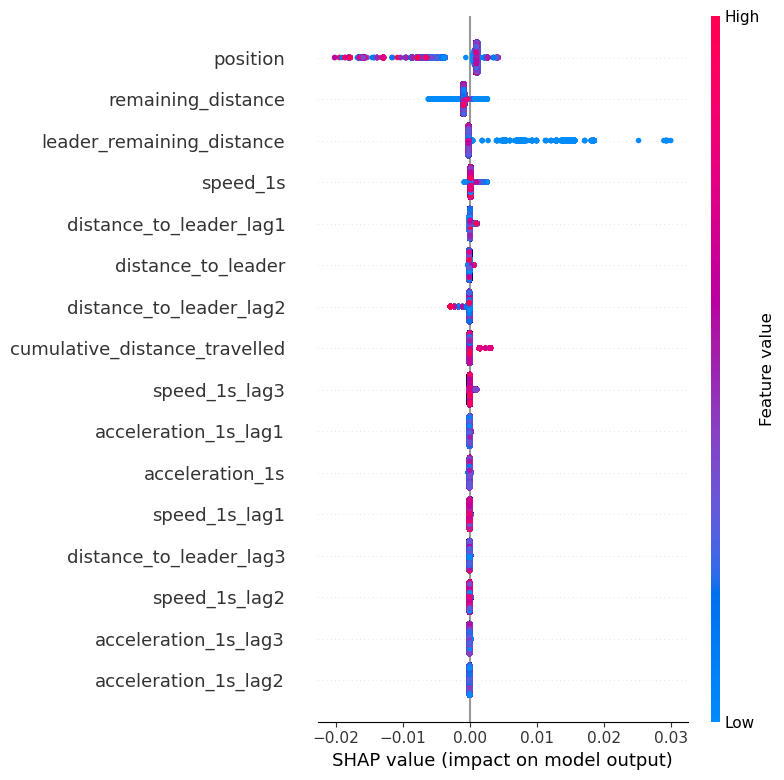

In [279]:
shap.summary_plot(shap_values, X_train)


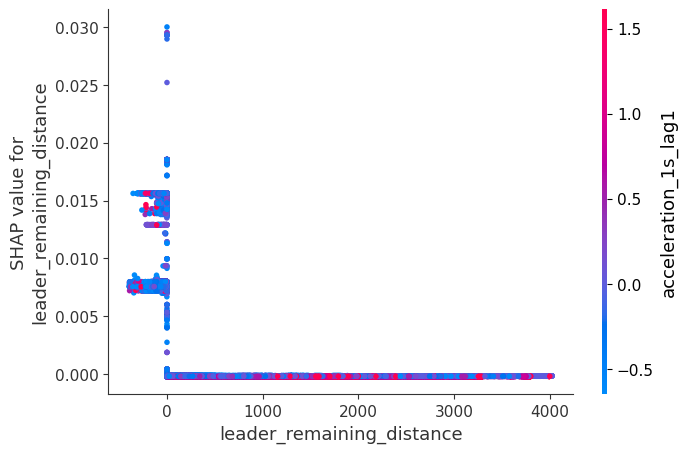

In [281]:
shap.dependence_plot('leader_remaining_distance', shap_values.values, X_train)


In [42]:
feature_important = model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())
f_imp_df = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by="score", ascending=True)
f_imp_df

,score
acceleration_1s,47.0
distance_to_leader,404.0
speed_1s,543.0
position,793.0
leader_remaining_distance,1281.0
